In [3]:
from statistics import correlation

import kagglehub

# Download latest version
path = kagglehub.dataset_download("akshaypawar7/millions-of-movies")

print("Path to dataset files:", path)

Path to dataset files: /Users/shreyavhadadi/.cache/kagglehub/datasets/akshaypawar7/millions-of-movies/versions/911


In [4]:
import pandas as pd
movies = pd.read_csv(f"{path}/movies.csv")

In [5]:
movies

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,3.520565e+08,116.0,Released,Back for seconds.,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,/qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg,1006462-298618-569094-1061181-346698-1076487-6...
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,6.567582e+07,103.0,Released,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...
2,533535,Deadpool & Wolverine,Action-Comedy-Science Fiction,en,A listless Wade Wilson toils away in civilian ...,5410.496,Marvel Studios-Maximum Effort-21 Laps Entertai...,2024-07-24,200000000.0,1.326387e+09,128.0,Released,Come together.,7.765,3749.0,Ryan Reynolds-Hugh Jackman-Emma Corrin-Matthew...,hero-superhero-anti hero-mutant-breaking the f...,/8cdWjvZQUExUUTzyp4t6EDMubfO.jpg,/dvBCdCohwWbsP5qAaglOXagDMtk.jpg,573435-519182-957452-1022789-945961-718821-103...
3,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,4.070455e+08,127.0,Released,Unite or fall.,7.340,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,/gPbM0MK8CP8A174rmUwGsADNYKD.jpg,/woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg,496450-569094-298618-385687-877100-598331-4628...
4,693134,Dune: Part Two,Science Fiction-Adventure,en,Follow the mythic journey of Paul Atreides as ...,4742.163,Legendary Pictures,2024-02-27,190000000.0,6.838137e+08,167.0,Released,Long live the fighters.,8.300,2770.0,Timothée Chalamet-Zendaya-Rebecca Ferguson-Jav...,epic-based on novel or book-fight-sandstorm-sa...,/czembW0Rk1Ke7lCJGahbOhdCuhV.jpg,/xOMo8BRK7PfcJv9JCnx7s5hj0PX.jpg,438631-763215-792307-1011985-467244-634492-359...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722312,836042,Tomcat Tales,Documentary-History-War,en,Learn from real-life Top Guns who have flown a...,0.001,NaN,2020-01-01,0.0,0.000000e+00,120.0,Released,NaN,0.000,0.0,NaN,NaN,/8mkAUkkRCLvMBMBvLFvhLF9SPC4.jpg,NaN,NaN
722313,527223,Strictly Modern,Comedy-Romance,en,Strictly Modern is a 1930 American pre-Code co...,0.001,First National Pictures-Warner Bros. Entertain...,1930-03-02,0.0,0.000000e+00,63.0,Released,Dorothy MACKAILL -THE WOMAN who thought she kn...,0.000,0.0,Dorothy Mackaill-Sidney Blackmer-Julanne Johns...,lost film,/qr4dU5DOhOJ3YTBdpdXpG6AUOyZ.jpg,NaN,NaN
722314,717787,Your Letter,Animation-Drama-Mystery-Adventure,ko,Sori Lee is hoping for a fresh start at her ne...,0.001,Studio N,2024-09-27,0.0,0.000000e+00,97.0,Released,NaN,0.000,0.0,Lee Soo-hyun-Kim Min-ju-Min Seungwoo-Nam Doh-h...,bullying-slice of life-school life,NaN,/thsAU92Ei2Nbm38ZdkvHI8xLaSc.jpg,NaN
722315,718477,Café Tacvba - Un Viaje,NaN,en,Un Viaje is the first live album by the rock b...,0.001,NaN,2005-04-19,0.0,0.000000e+00,120.0,Released,NaN,0.000,0.0,Rubén Albarrán-Emmanuel del Real-Joselo Rangel...,NaN,/95HgsWBDuSJBgcq0Fkv4JYZeTdR.jpg,/laiCThOhK5LKJJsMSXSzoePv8uX.jpg,NaN


In [6]:
import seaborn as sns

In [7]:
import matplotlib.pyplot as plt

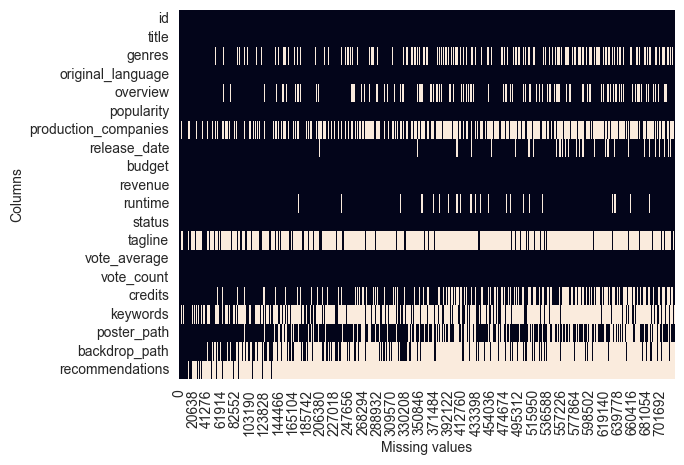

In [8]:
ax= plt.axes()
sns.heatmap(movies.isna().transpose(), cbar=False, ax=ax)
plt.xlabel("Missing values")
plt.ylabel("Columns")
plt.show()

In [9]:
import numpy as np


In [10]:
movies["missing_overview"]=np.where(movies["overview"].isna(),1,0)

In [11]:
movies['release_date'] = pd.to_datetime(movies['release_date'])

In [12]:
release_months = movies['release_date'].values.astype('datetime64[M]')
print(release_months)

['2023-08' '2023-04' '2024-07' ... '2024-09' '2005-04' '1981-05']


In [13]:
# Define your reference date
reference_month = np.datetime64('2025-06', 'M')

In [14]:
delta_months = (reference_month - release_months).astype(int)
age_in_years = np.round(delta_months / 12.0, 1)
print(age_in_years)

[ 1.8  2.2  0.9 ...  0.8 20.2 44.1]


In [15]:
movies['movie_age'] = age_in_years

In [16]:
column_of_interest = ["movie_age","missing_overview","popularity","runtime"]

In [17]:
correlation_matrix=movies[column_of_interest].corr(method="spearman")

In [18]:
correlation_matrix

,movie_age,missing_overview,popularity,runtime
movie_age,1.000000,0.016903,0.041881,0.088589
missing_overview,0.016903,1.000000,-0.179444,-0.412138
popularity,0.041881,-0.179444,1.000000,0.423173
runtime,0.088589,-0.412138,0.423173,1.000000


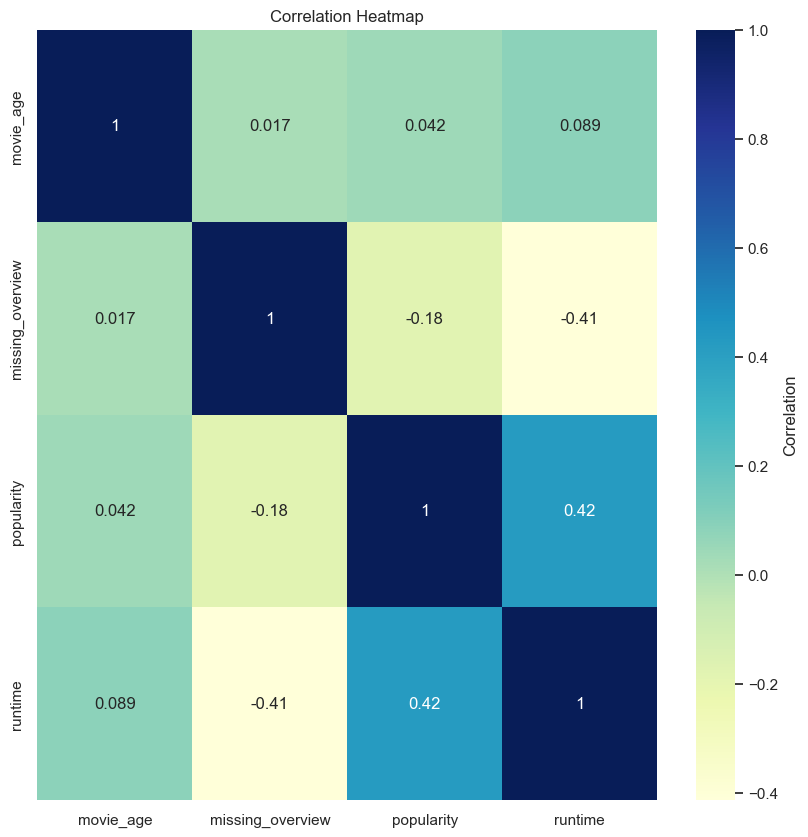

In [19]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10,10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu",cbar_kws={"label": "Correlation"})
heatmap.set_title("Correlation Heatmap")
plt.show()

In [20]:
movies.shape

(722317, 22)

In [21]:
movies_missing=movies[~(movies["movie_age"].isna()) &
        ~(movies["missing_overview"].isna()) &
       ~(movies["popularity"].isna()) &
       ~(movies["runtime"].isna())
]

In [22]:
movies_missing

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,...,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations,missing_overview,movie_age
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,3.520565e+08,...,Back for seconds.,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,/qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg,1006462-298618-569094-1061181-346698-1076487-6...,0,1.8
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,6.567582e+07,...,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...,0,2.2
2,533535,Deadpool & Wolverine,Action-Comedy-Science Fiction,en,A listless Wade Wilson toils away in civilian ...,5410.496,Marvel Studios-Maximum Effort-21 Laps Entertai...,2024-07-24,200000000.0,1.326387e+09,...,Come together.,7.765,3749.0,Ryan Reynolds-Hugh Jackman-Emma Corrin-Matthew...,hero-superhero-anti hero-mutant-breaking the f...,/8cdWjvZQUExUUTzyp4t6EDMubfO.jpg,/dvBCdCohwWbsP5qAaglOXagDMtk.jpg,573435-519182-957452-1022789-945961-718821-103...,0,0.9
3,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,4.070455e+08,...,Unite or fall.,7.340,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,/gPbM0MK8CP8A174rmUwGsADNYKD.jpg,/woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg,496450-569094-298618-385687-877100-598331-4628...,0,2.0
4,693134,Dune: Part Two,Science Fiction-Adventure,en,Follow the mythic journey of Paul Atreides as ...,4742.163,Legendary Pictures,2024-02-27,190000000.0,6.838137e+08,...,Long live the fighters.,8.300,2770.0,Timothée Chalamet-Zendaya-Rebecca Ferguson-Jav...,epic-based on novel or book-fight-sandstorm-sa...,/czembW0Rk1Ke7lCJGahbOhdCuhV.jpg,/xOMo8BRK7PfcJv9JCnx7s5hj0PX.jpg,438631-763215-792307-1011985-467244-634492-359...,0,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722312,836042,Tomcat Tales,Documentary-History-War,en,Learn from real-life Top Guns who have flown a...,0.001,NaN,2020-01-01,0.0,0.000000e+00,...,NaN,0.000,0.0,NaN,NaN,/8mkAUkkRCLvMBMBvLFvhLF9SPC4.jpg,NaN,NaN,0,5.4
722313,527223,Strictly Modern,Comedy-Romance,en,Strictly Modern is a 1930 American pre-Code co...,0.001,First National Pictures-Warner Bros. Entertain...,1930-03-02,0.0,0.000000e+00,...,Dorothy MACKAILL -THE WOMAN who thought she kn...,0.000,0.0,Dorothy Mackaill-Sidney Blackmer-Julanne Johns...,lost film,/qr4dU5DOhOJ3YTBdpdXpG6AUOyZ.jpg,NaN,NaN,0,95.2
722314,717787,Your Letter,Animation-Drama-Mystery-Adventure,ko,Sori Lee is hoping for a fresh start at her ne...,0.001,Studio N,2024-09-27,0.0,0.000000e+00,...,NaN,0.000,0.0,Lee Soo-hyun-Kim Min-ju-Min Seungwoo-Nam Doh-h...,bullying-slice of life-school life,NaN,/thsAU92Ei2Nbm38ZdkvHI8xLaSc.jpg,NaN,0,0.8
722315,718477,Café Tacvba - Un Viaje,NaN,en,Un Viaje is the first live album by the rock b...,0.001,NaN,2005-04-19,0.0,0.000000e+00,...,NaN,0.000,0.0,Rubén Albarrán-Emmanuel del Real-Joselo Rangel...,NaN,/95HgsWBDuSJBgcq0Fkv4JYZeTdR.jpg,/laiCThOhK5LKJJsMSXSzoePv8uX.jpg,NaN,0,20.2


In [23]:
movies_missing["genres"].value_counts().reset_index().sort_values("count", ascending=False)

,genres,count
0,Documentary,92033
1,Drama,76151
2,Comedy,44187
3,Animation,22057
4,Music,17067
...,...,...
7121,Drama-Documentary-Horror,1
7120,Science Fiction-Horror-Mystery-Fantasy,1
7119,Animation-Comedy-Romance-Horror,1
7118,Documentary-Thriller-Mystery-Drama,1


In [24]:
movies_missing["words_in_overview2"]=movies_missing["overview"].str.split().str.len()

/var/folders/dz/ylsybmt90k106hjx7_vfj12w0000gn/T/ipykernel_43099/3380190645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_missing["words_in_overview2"]=movies_missing["overview"].str.split().str.len()


In [25]:
movies_missing["words_in_overview2"]

0         35.0
1         29.0
2         39.0
3         59.0
4         55.0
          ... 
722312    25.0
722313    28.0
722314    85.0
722315    43.0
722316    24.0
Name: words_in_overview2, Length: 687982, dtype: float64

In [26]:
movies_missing

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,...,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations,missing_overview,movie_age,words_in_overview2
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,3.520565e+08,...,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,/qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg,1006462-298618-569094-1061181-346698-1076487-6...,0,1.8,35.0
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,6.567582e+07,...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...,0,2.2,29.0
2,533535,Deadpool & Wolverine,Action-Comedy-Science Fiction,en,A listless Wade Wilson toils away in civilian ...,5410.496,Marvel Studios-Maximum Effort-21 Laps Entertai...,2024-07-24,200000000.0,1.326387e+09,...,7.765,3749.0,Ryan Reynolds-Hugh Jackman-Emma Corrin-Matthew...,hero-superhero-anti hero-mutant-breaking the f...,/8cdWjvZQUExUUTzyp4t6EDMubfO.jpg,/dvBCdCohwWbsP5qAaglOXagDMtk.jpg,573435-519182-957452-1022789-945961-718821-103...,0,0.9,39.0
3,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,4.070455e+08,...,7.340,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,/gPbM0MK8CP8A174rmUwGsADNYKD.jpg,/woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg,496450-569094-298618-385687-877100-598331-4628...,0,2.0,59.0
4,693134,Dune: Part Two,Science Fiction-Adventure,en,Follow the mythic journey of Paul Atreides as ...,4742.163,Legendary Pictures,2024-02-27,190000000.0,6.838137e+08,...,8.300,2770.0,Timothée Chalamet-Zendaya-Rebecca Ferguson-Jav...,epic-based on novel or book-fight-sandstorm-sa...,/czembW0Rk1Ke7lCJGahbOhdCuhV.jpg,/xOMo8BRK7PfcJv9JCnx7s5hj0PX.jpg,438631-763215-792307-1011985-467244-634492-359...,0,1.3,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722312,836042,Tomcat Tales,Documentary-History-War,en,Learn from real-life Top Guns who have flown a...,0.001,NaN,2020-01-01,0.0,0.000000e+00,...,0.000,0.0,NaN,NaN,/8mkAUkkRCLvMBMBvLFvhLF9SPC4.jpg,NaN,NaN,0,5.4,25.0
722313,527223,Strictly Modern,Comedy-Romance,en,Strictly Modern is a 1930 American pre-Code co...,0.001,First National Pictures-Warner Bros. Entertain...,1930-03-02,0.0,0.000000e+00,...,0.000,0.0,Dorothy Mackaill-Sidney Blackmer-Julanne Johns...,lost film,/qr4dU5DOhOJ3YTBdpdXpG6AUOyZ.jpg,NaN,NaN,0,95.2,28.0
722314,717787,Your Letter,Animation-Drama-Mystery-Adventure,ko,Sori Lee is hoping for a fresh start at her ne...,0.001,Studio N,2024-09-27,0.0,0.000000e+00,...,0.000,0.0,Lee Soo-hyun-Kim Min-ju-Min Seungwoo-Nam Doh-h...,bullying-slice of life-school life,NaN,/thsAU92Ei2Nbm38ZdkvHI8xLaSc.jpg,NaN,0,0.8,85.0
722315,718477,Café Tacvba - Un Viaje,NaN,en,Un Viaje is the first live album by the rock b...,0.001,NaN,2005-04-19,0.0,0.000000e+00,...,0.000,0.0,Rubén Albarrán-Emmanuel del Real-Joselo Rangel...,NaN,/95HgsWBDuSJBgcq0Fkv4JYZeTdR.jpg,/laiCThOhK5LKJJsMSXSzoePv8uX.jpg,NaN,0,20.2,43.0


In [36]:
movies_missing.loc[movies_missing["words_in_overview2"].between(1,3), "overview"]

1484      Nikkatsu Roman Porno
1587            FUK YOUtube :P
1734            FUK YOUtube :P
1899            FUK YOUtube :P
3850      Mexican feature film
                  ...         
722067           Mexican movie
722190            A Short Film
722196    Mexican feature film
722245                    buna
722267         Bollywood 1988.
Name: overview, Length: 7362, dtype: object

In [37]:
movies_missing.loc[movies_missing["words_in_overview2"].between(4,14), "overview"]

KeyError: 'words_in_overview1'

In [27]:
movies_missing.loc[movies_missing["words_in_overview2"].between(4, 24), "overview"]

19        After their late former Captain is framed Lowr...
21        In 1956 France a priest is violently murdered ...
27        A fading celebrity decides to use a black mark...
35        As New York City is invaded by alien creatures...
47        During the war in Afghanistan a local interpre...
                                ...                        
722299         Starter DVD in the Your Baby Can Read series
722302                   Italian documentary on submarines.
722304    A horse always finds greener grass in his neig...
722310    A young woman attends a Friendsgiving party ho...
722316    Two men who have the financial problems decide...
Name: overview, Length: 178820, dtype: object

In [28]:
movie_missing_25_words = movies_missing[movies_missing["words_in_overview2"]>=25]

In [29]:
movie_missing_25_words

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,...,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations,missing_overview,movie_age,words_in_overview2
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,3.520565e+08,...,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,/qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg,1006462-298618-569094-1061181-346698-1076487-6...,0,1.8,35.0
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,6.567582e+07,...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...,0,2.2,29.0
2,533535,Deadpool & Wolverine,Action-Comedy-Science Fiction,en,A listless Wade Wilson toils away in civilian ...,5410.496,Marvel Studios-Maximum Effort-21 Laps Entertai...,2024-07-24,200000000.0,1.326387e+09,...,7.765,3749.0,Ryan Reynolds-Hugh Jackman-Emma Corrin-Matthew...,hero-superhero-anti hero-mutant-breaking the f...,/8cdWjvZQUExUUTzyp4t6EDMubfO.jpg,/dvBCdCohwWbsP5qAaglOXagDMtk.jpg,573435-519182-957452-1022789-945961-718821-103...,0,0.9,39.0
3,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,4.070455e+08,...,7.340,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,/gPbM0MK8CP8A174rmUwGsADNYKD.jpg,/woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg,496450-569094-298618-385687-877100-598331-4628...,0,2.0,59.0
4,693134,Dune: Part Two,Science Fiction-Adventure,en,Follow the mythic journey of Paul Atreides as ...,4742.163,Legendary Pictures,2024-02-27,190000000.0,6.838137e+08,...,8.300,2770.0,Timothée Chalamet-Zendaya-Rebecca Ferguson-Jav...,epic-based on novel or book-fight-sandstorm-sa...,/czembW0Rk1Ke7lCJGahbOhdCuhV.jpg,/xOMo8BRK7PfcJv9JCnx7s5hj0PX.jpg,438631-763215-792307-1011985-467244-634492-359...,0,1.3,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722311,881325,The Unlucky Indian Woman,Drama-Crime,tk,Nabat is a victim of feudal relations in the c...,0.001,Karakumfilm,1992-01-01,0.0,0.000000e+00,...,0.000,0.0,Dzheren Ishankuliyeva-B. Khodzhayeva-A. Zhaldyev,NaN,NaN,NaN,NaN,0,33.4,75.0
722312,836042,Tomcat Tales,Documentary-History-War,en,Learn from real-life Top Guns who have flown a...,0.001,NaN,2020-01-01,0.0,0.000000e+00,...,0.000,0.0,NaN,NaN,/8mkAUkkRCLvMBMBvLFvhLF9SPC4.jpg,NaN,NaN,0,5.4,25.0
722313,527223,Strictly Modern,Comedy-Romance,en,Strictly Modern is a 1930 American pre-Code co...,0.001,First National Pictures-Warner Bros. Entertain...,1930-03-02,0.0,0.000000e+00,...,0.000,0.0,Dorothy Mackaill-Sidney Blackmer-Julanne Johns...,lost film,/qr4dU5DOhOJ3YTBdpdXpG6AUOyZ.jpg,NaN,NaN,0,95.2,28.0
722314,717787,Your Letter,Animation-Drama-Mystery-Adventure,ko,Sori Lee is hoping for a fresh start at her ne...,0.001,Studio N,2024-09-27,0.0,0.000000e+00,...,0.000,0.0,Lee Soo-hyun-Kim Min-ju-Min Seungwoo-Nam Doh-h...,bullying-slice of life-school life,NaN,/thsAU92Ei2Nbm38ZdkvHI8xLaSc.jpg,NaN,0,0.8,85.0


In [30]:
movie_missing_25_words["tagged_overview1"]=movie_missing_25_words[["id","overview"]].astype(str).agg(" ".join, axis=1)

/var/folders/dz/ylsybmt90k106hjx7_vfj12w0000gn/T/ipykernel_43099/952997518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_missing_25_words["tagged_overview1"]=movie_missing_25_words[["id","overview"]].astype(str).agg(" ".join, axis=1)


In [31]:
movie_missing_25_words

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,...,vote_count,credits,keywords,poster_path,backdrop_path,recommendations,missing_overview,movie_age,words_in_overview2,tagged_overview1
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,3.520565e+08,...,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,/qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg,1006462-298618-569094-1061181-346698-1076487-6...,0,1.8,35.0,615656 An exploratory dive into the deepest de...
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,6.567582e+07,...,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...,0,2.2,29.0,758323 Father Gabriele Amorth Chief Exorcist o...
2,533535,Deadpool & Wolverine,Action-Comedy-Science Fiction,en,A listless Wade Wilson toils away in civilian ...,5410.496,Marvel Studios-Maximum Effort-21 Laps Entertai...,2024-07-24,200000000.0,1.326387e+09,...,3749.0,Ryan Reynolds-Hugh Jackman-Emma Corrin-Matthew...,hero-superhero-anti hero-mutant-breaking the f...,/8cdWjvZQUExUUTzyp4t6EDMubfO.jpg,/dvBCdCohwWbsP5qAaglOXagDMtk.jpg,573435-519182-957452-1022789-945961-718821-103...,0,0.9,39.0,533535 A listless Wade Wilson toils away in ci...
3,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,4.070455e+08,...,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,/gPbM0MK8CP8A174rmUwGsADNYKD.jpg,/woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg,496450-569094-298618-385687-877100-598331-4628...,0,2.0,59.0,667538 When a new threat capable of destroying...
4,693134,Dune: Part Two,Science Fiction-Adventure,en,Follow the mythic journey of Paul Atreides as ...,4742.163,Legendary Pictures,2024-02-27,190000000.0,6.838137e+08,...,2770.0,Timothée Chalamet-Zendaya-Rebecca Ferguson-Jav...,epic-based on novel or book-fight-sandstorm-sa...,/czembW0Rk1Ke7lCJGahbOhdCuhV.jpg,/xOMo8BRK7PfcJv9JCnx7s5hj0PX.jpg,438631-763215-792307-1011985-467244-634492-359...,0,1.3,55.0,693134 Follow the mythic journey of Paul Atrei...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722311,881325,The Unlucky Indian Woman,Drama-Crime,tk,Nabat is a victim of feudal relations in the c...,0.001,Karakumfilm,1992-01-01,0.0,0.000000e+00,...,0.0,Dzheren Ishankuliyeva-B. Khodzhayeva-A. Zhaldyev,NaN,NaN,NaN,NaN,0,33.4,75.0,881325 Nabat is a victim of feudal relations i...
722312,836042,Tomcat Tales,Documentary-History-War,en,Learn from real-life Top Guns who have flown a...,0.001,NaN,2020-01-01,0.0,0.000000e+00,...,0.0,NaN,NaN,/8mkAUkkRCLvMBMBvLFvhLF9SPC4.jpg,NaN,NaN,0,5.4,25.0,836042 Learn from real-life Top Guns who have ...
722313,527223,Strictly Modern,Comedy-Romance,en,Strictly Modern is a 1930 American pre-Code co...,0.001,First National Pictures-Warner Bros. Entertain...,1930-03-02,0.0,0.000000e+00,...,0.0,Dorothy Mackaill-Sidney Blackmer-Julanne Johns...,lost film,/qr4dU5DOhOJ3YTBdpdXpG6AUOyZ.jpg,NaN,NaN,0,95.2,28.0,527223 Strictly Modern is a 1930 American pre-...
722314,717787,Your Letter,Animation-Drama-Mystery-Adventure,ko,Sori Lee is hoping for a fresh start at her ne...,0.001,Studio N,2024-09-27,0.0,0.000000e+00,...,0.0,Lee Soo-hyun-Kim Min-ju-Min Seungwoo-Nam Doh-h...,bullying-slice of life-school life,NaN,/thsAU92Ei2Nbm38ZdkvHI8xLaSc.jpg,NaN,0,0.8,85.0,717787 Sori Lee is hoping for a fresh start 

In [32]:
subset_df1 = movie_missing_25_words.sample(n=15000, random_state=42)

In [33]:
subset_df1

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,...,vote_count,credits,keywords,poster_path,backdrop_path,recommendations,missing_overview,movie_age,words_in_overview2,tagged_overview1
713242,838513,POV: Points Of View,NaN,en,Los Angeles 2025. As an Insighter you have bee...,0.600,NaN,2021-06-09,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,0,4.0,105.0,838513 Los Angeles 2025. As an Insighter you h...
657253,370005,Storm,Drama-TV Movie,sv,An elderly gentleman lives alone with his mai...,0.600,Sveriges Radio (SR),1960-01-22,0.0,0.0,...,4.0,Uno Henning-Mona Malm-John Elfström-Ingvar Kje...,NaN,/dFXFiPDCmMwa8Jou4TpgP0wFdo1.jpg,NaN,NaN,0,65.4,157.0,370005 An elderly gentleman lives alone with ...
195347,590634,Friended: Deep Dark Web,Comedy,en,Marcus has invented the ultimate dating app ut...,1.175,NaN,2018-11-01,0.0,0.0,...,1.0,Julie Anne Prescott-Nique Rose-Matthew Rosvally,NaN,/xZejKMFA51K0LkNlOb5FKzINOqi.jpg,NaN,NaN,0,6.6,38.0,590634 Marcus has invented the ultimate dating...
321205,832873,Feedback Sketch #1,NaN,en,Multiple clips of video feedback (a MiniDV cam...,0.643,NaN,2021-05-23,0.0,0.0,...,0.0,NaN,NaN,/dnWnZpokkSnP451p30fd4wNbrKD.jpg,NaN,NaN,0,4.1,71.0,832873 Multiple clips of video feedback (a Min...
388609,592976,Verdi: Otello,Music,it,Like an outcry the elemental force of the orch...,0.600,Bayerische Staatsoper,2018-12-02,0.0,0.0,...,0.0,Jonas Kaufmann-Gerald Finley-Anja Harteros-Eva...,NaN,/215ttX6RF99n2TTEv25IRtYiYiB.jpg,/wF1n4XY2qjLB2ibMotXOSimhDoN.jpg,NaN,0,6.5,125.0,592976 Like an outcry the elemental force of t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122359,302694,Bridgend,Mystery-Documentary,en,Since 2007 dozens of young people have been fo...,1.585,John Michael Williams Productions,2013-06-21,0.0,0.0,...,12.0,NaN,death-suicide by hanging-teen suicide,NaN,NaN,NaN,0,12.0,57.0,302694 Since 2007 dozens of young people have ...
713657,771282,Imaginary Portrait,Fantasy,es,Through the creation of a family portrait a me...,0.600,Hemisferio Films,2020-07-13,0.0,0.0,...,1.0,Cecilia Li Causi-Mirko Buchín-Julio Chianetta-...,dead mother-short film,/aUNSaHNMV6qp9L1P82WLgp7WCiY.jpg,/zsXxGjmJUqCEq1pZq9gcktPn1Cv.jpg,NaN,0,4.9,27.0,771282 Through the creation of a family portra...
484135,505538,Oscar D' Leon - Live From London,Music,es,After several undistinguished albums in the ea...,0.600,NaN,1988-02-16,0.0,0.0,...,0.0,Oscar D'León,venezuela-salsa,/pLM2v2WA5eNFQlb5aKYtRLnwZWj.jpg,/432e3u6KYRQY3X7Ieqfe5TNaj4V.jpg,NaN,0,37.3,120.0,505538 After several undistinguished albums in...
35118,24613,Kurbaan,Crime-Drama-Romance-Thriller-Action,hi,When a handsome young Indian couple (Saif Ali ...,5.278,UTV Motion Pictures-Dharma Productions,2009-11-20,7700000.0,6600000.0,...,33.0,Saif Ali Khan-Kareena Kapoor Khan-Vivek Oberoi...,new york city-journalist-terrorist-investigati...,/eLG5R5pgVpTMFQbVeGhcUu1xSH1.jpg,/lj75MIYF4fnnONdkLphFrwZ67DM.jpg,NaN,0,15.6,56.0,24613 When a handsome young Indian couple (Sai...


In [40]:
(
    subset_df1
    .drop(["original_language", "popularity","production_companies","release_date","budget","revenue","runtime","status","tagline","vote_count","credits","keywords","backdrop_path","recommendations","missing_overview","words_in_overview2"], axis=1).to_csv("movies_cleaned_final4.csv",index=False)
)

In [41]:
subset_df1

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,...,vote_count,credits,keywords,poster_path,backdrop_path,recommendations,missing_overview,movie_age,words_in_overview2,tagged_overview1
713242,838513,POV: Points Of View,NaN,en,Los Angeles 2025. As an Insighter you have bee...,0.600,NaN,2021-06-09,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,0,4.0,105.0,838513 Los Angeles 2025. As an Insighter you h...
657253,370005,Storm,Drama-TV Movie,sv,An elderly gentleman lives alone with his mai...,0.600,Sveriges Radio (SR),1960-01-22,0.0,0.0,...,4.0,Uno Henning-Mona Malm-John Elfström-Ingvar Kje...,NaN,/dFXFiPDCmMwa8Jou4TpgP0wFdo1.jpg,NaN,NaN,0,65.4,157.0,370005 An elderly gentleman lives alone with ...
195347,590634,Friended: Deep Dark Web,Comedy,en,Marcus has invented the ultimate dating app ut...,1.175,NaN,2018-11-01,0.0,0.0,...,1.0,Julie Anne Prescott-Nique Rose-Matthew Rosvally,NaN,/xZejKMFA51K0LkNlOb5FKzINOqi.jpg,NaN,NaN,0,6.6,38.0,590634 Marcus has invented the ultimate dating...
321205,832873,Feedback Sketch #1,NaN,en,Multiple clips of video feedback (a MiniDV cam...,0.643,NaN,2021-05-23,0.0,0.0,...,0.0,NaN,NaN,/dnWnZpokkSnP451p30fd4wNbrKD.jpg,NaN,NaN,0,4.1,71.0,832873 Multiple clips of video feedback (a Min...
388609,592976,Verdi: Otello,Music,it,Like an outcry the elemental force of the orch...,0.600,Bayerische Staatsoper,2018-12-02,0.0,0.0,...,0.0,Jonas Kaufmann-Gerald Finley-Anja Harteros-Eva...,NaN,/215ttX6RF99n2TTEv25IRtYiYiB.jpg,/wF1n4XY2qjLB2ibMotXOSimhDoN.jpg,NaN,0,6.5,125.0,592976 Like an outcry the elemental force of t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122359,302694,Bridgend,Mystery-Documentary,en,Since 2007 dozens of young people have been fo...,1.585,John Michael Williams Productions,2013-06-21,0.0,0.0,...,12.0,NaN,death-suicide by hanging-teen suicide,NaN,NaN,NaN,0,12.0,57.0,302694 Since 2007 dozens of young people have ...
713657,771282,Imaginary Portrait,Fantasy,es,Through the creation of a family portrait a me...,0.600,Hemisferio Films,2020-07-13,0.0,0.0,...,1.0,Cecilia Li Causi-Mirko Buchín-Julio Chianetta-...,dead mother-short film,/aUNSaHNMV6qp9L1P82WLgp7WCiY.jpg,/zsXxGjmJUqCEq1pZq9gcktPn1Cv.jpg,NaN,0,4.9,27.0,771282 Through the creation of a family portra...
484135,505538,Oscar D' Leon - Live From London,Music,es,After several undistinguished albums in the ea...,0.600,NaN,1988-02-16,0.0,0.0,...,0.0,Oscar D'León,venezuela-salsa,/pLM2v2WA5eNFQlb5aKYtRLnwZWj.jpg,/432e3u6KYRQY3X7Ieqfe5TNaj4V.jpg,NaN,0,37.3,120.0,505538 After several undistinguished albums in...
35118,24613,Kurbaan,Crime-Drama-Romance-Thriller-Action,hi,When a handsome young Indian couple (Saif Ali ...,5.278,UTV Motion Pictures-Dharma Productions,2009-11-20,7700000.0,6600000.0,...,33.0,Saif Ali Khan-Kareena Kapoor Khan-Vivek Oberoi...,new york city-journalist-terrorist-investigati...,/eLG5R5pgVpTMFQbVeGhcUu1xSH1.jpg,/lj75MIYF4fnnONdkLphFrwZ67DM.jpg,NaN,0,15.6,56.0,24613 When a handsome young Indian couple (Sai...


In [42]:
subset_df1

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,...,vote_count,credits,keywords,poster_path,backdrop_path,recommendations,missing_overview,movie_age,words_in_overview2,tagged_overview1
713242,838513,POV: Points Of View,NaN,en,Los Angeles 2025. As an Insighter you have bee...,0.600,NaN,2021-06-09,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,0,4.0,105.0,838513 Los Angeles 2025. As an Insighter you h...
657253,370005,Storm,Drama-TV Movie,sv,An elderly gentleman lives alone with his mai...,0.600,Sveriges Radio (SR),1960-01-22,0.0,0.0,...,4.0,Uno Henning-Mona Malm-John Elfström-Ingvar Kje...,NaN,/dFXFiPDCmMwa8Jou4TpgP0wFdo1.jpg,NaN,NaN,0,65.4,157.0,370005 An elderly gentleman lives alone with ...
195347,590634,Friended: Deep Dark Web,Comedy,en,Marcus has invented the ultimate dating app ut...,1.175,NaN,2018-11-01,0.0,0.0,...,1.0,Julie Anne Prescott-Nique Rose-Matthew Rosvally,NaN,/xZejKMFA51K0LkNlOb5FKzINOqi.jpg,NaN,NaN,0,6.6,38.0,590634 Marcus has invented the ultimate dating...
321205,832873,Feedback Sketch #1,NaN,en,Multiple clips of video feedback (a MiniDV cam...,0.643,NaN,2021-05-23,0.0,0.0,...,0.0,NaN,NaN,/dnWnZpokkSnP451p30fd4wNbrKD.jpg,NaN,NaN,0,4.1,71.0,832873 Multiple clips of video feedback (a Min...
388609,592976,Verdi: Otello,Music,it,Like an outcry the elemental force of the orch...,0.600,Bayerische Staatsoper,2018-12-02,0.0,0.0,...,0.0,Jonas Kaufmann-Gerald Finley-Anja Harteros-Eva...,NaN,/215ttX6RF99n2TTEv25IRtYiYiB.jpg,/wF1n4XY2qjLB2ibMotXOSimhDoN.jpg,NaN,0,6.5,125.0,592976 Like an outcry the elemental force of t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122359,302694,Bridgend,Mystery-Documentary,en,Since 2007 dozens of young people have been fo...,1.585,John Michael Williams Productions,2013-06-21,0.0,0.0,...,12.0,NaN,death-suicide by hanging-teen suicide,NaN,NaN,NaN,0,12.0,57.0,302694 Since 2007 dozens of young people have ...
713657,771282,Imaginary Portrait,Fantasy,es,Through the creation of a family portrait a me...,0.600,Hemisferio Films,2020-07-13,0.0,0.0,...,1.0,Cecilia Li Causi-Mirko Buchín-Julio Chianetta-...,dead mother-short film,/aUNSaHNMV6qp9L1P82WLgp7WCiY.jpg,/zsXxGjmJUqCEq1pZq9gcktPn1Cv.jpg,NaN,0,4.9,27.0,771282 Through the creation of a family portra...
484135,505538,Oscar D' Leon - Live From London,Music,es,After several undistinguished albums in the ea...,0.600,NaN,1988-02-16,0.0,0.0,...,0.0,Oscar D'León,venezuela-salsa,/pLM2v2WA5eNFQlb5aKYtRLnwZWj.jpg,/432e3u6KYRQY3X7Ieqfe5TNaj4V.jpg,NaN,0,37.3,120.0,505538 After several undistinguished albums in...
35118,24613,Kurbaan,Crime-Drama-Romance-Thriller-Action,hi,When a handsome young Indian couple (Saif Ali ...,5.278,UTV Motion Pictures-Dharma Productions,2009-11-20,7700000.0,6600000.0,...,33.0,Saif Ali Khan-Kareena Kapoor Khan-Vivek Oberoi...,new york city-journalist-terrorist-investigati...,/eLG5R5pgVpTMFQbVeGhcUu1xSH1.jpg,/lj75MIYF4fnnONdkLphFrwZ67DM.jpg,NaN,0,15.6,56.0,24613 When a handsome young Indian couple (Sai...
